<a href="https://colab.research.google.com/github/Aditya1BM22CS017/6A-ML-Lab-Batch2/blob/main/1BM22CS017_Lab_10_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSV file 'income.csv' created.


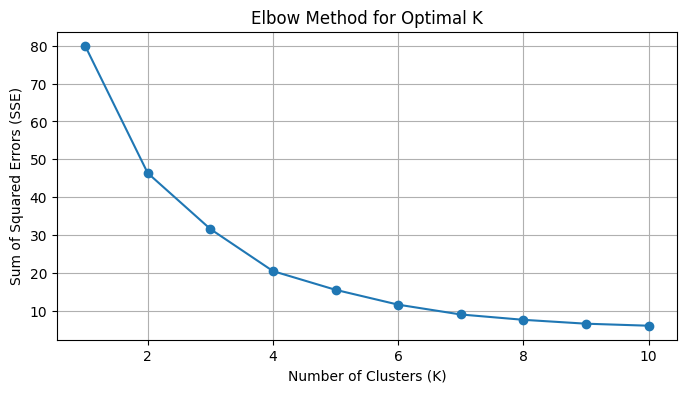

Adjusted Rand Index (proxy accuracy): 0.47


In [ ]:
import pandas as pd
import numpy as np
import random
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Step 1: Generate data
def random_name():
    return ''.join(random.choices(string.ascii_uppercase, k=5))

np.random.seed(42)
data = {
    'Name': [random_name() for _ in range(50)],
    'Age': np.random.randint(20, 60, size=50),
    'Income': np.random.randint(30000, 100000, size=50)
}

df = pd.DataFrame(data)
df.to_csv("income.csv", index=False)
print("CSV file 'income.csv' created.")

# Step 2: Load and preprocess
df = pd.read_csv("income.csv")
X = df[['Age', 'Income']]  # Drop Name for modeling

# Step 3: Train-test split
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Step 4: Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Elbow Method - Plot SSE vs K
sse = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_train_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# Step 6: Fit and Predict using optimal K (e.g., choose K=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X_train_scaled)
train_labels = kmeans.labels_
test_labels = kmeans.predict(X_test_scaled)

# Since we don’t have true labels, simulate labels for "accuracy" proxy
# We'll re-cluster the full dataset and use Adjusted Rand Index as proxy
kmeans_full = KMeans(n_clusters=3, random_state=42, n_init='auto')
X_scaled = scaler.fit_transform(X)
pred_full = kmeans_full.fit_predict(X_scaled)

# Evaluate clustering consistency (proxy to accuracy)
X_train_idx = X_train.index
X_test_idx = X_test.index

true_test_labels = pred_full[X_test_idx]
ari_score = adjusted_rand_score(true_test_labels, test_labels)
print(f"Adjusted Rand Index (proxy accuracy): {ari_score:.2f}")
